In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if the mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\PG_DA\\ML\\DATA\\mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


## Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

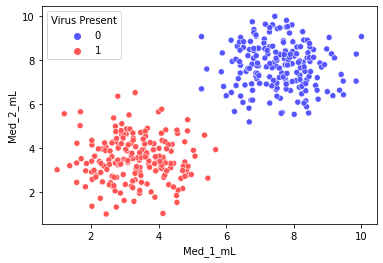

In [4]:
sns.scatterplot(x ="Med_1_mL", y ="Med_2_mL", data = df, hue = "Virus Present",
               palette="seismic")

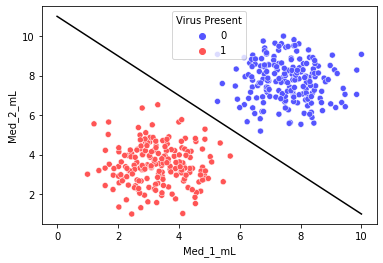

In [5]:
sns.scatterplot(x ="Med_1_mL", y ="Med_2_mL", data = df, hue = "Virus Present",
               palette="seismic")

#We want to somehow automatically create a separating hyperplane (a line in 2D)

x = np.linspace(0,10,100)

m = -1
b = 11
y = m*x + b

plt.plot(x,y, "black")
plt.show()

## SVM - Support Vector Machine

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [6]:
X = df.drop("Virus Present", axis =1)
y = df["Virus Present"]

In [7]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [8]:
model = SVC(kernel="linear", C= 1000)    
# C is regularization parameter
# C refers to "How many points you are allowing to be within the margin?"

For this particular C inside the Scikit learn,it's inversely proportional to the soft margin parameters so we choose large number here

In [9]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [10]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

from svm_margin_plot import plot_svm_boundary

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


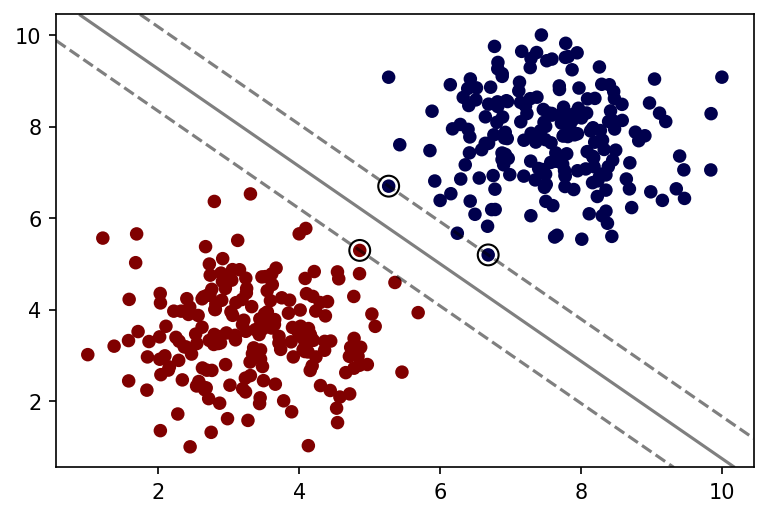

In [11]:
plt.figure(dpi = 150)
plot_svm_boundary(model, X, y)

plt.show()

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [12]:
model = SVC(C= 0.05, kernel= "linear")

In [13]:
model.fit(X, y )

SVC(C=0.05, kernel='linear')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


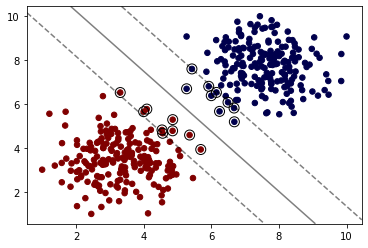

In [14]:
plot_svm_boundary(model,X,y)

As C gets closer to zero we are allowing more points to go within the 
margin

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [15]:
model = SVC(kernel="rbf", C = 1)

In [16]:
model.fit(X,y)

SVC(C=1)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


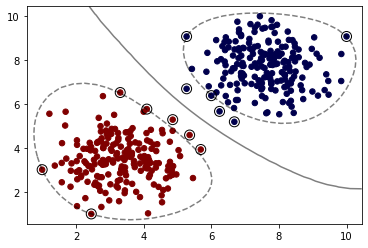

In [17]:
plot_svm_boundary(model,X,y)

Here, we can see the margins surrounding our clusters and the points outside the margin are our support vectors.
- We can think these points as not outside the margin but really in between the hyperplane and the margin.

Technically, the margin and the hyperplane are occuring in higher dimensional feature space. We are just projecting it back down to two features which is why it looks circular.

# With Gamma

Gamma defines how much influence a single training example has. So that means that as Gamma gets larger, the closer the other exapmles have to be in order to be effective

In [18]:
model = SVC(C = 1, kernel= "rbf",  gamma="auto")

In [19]:
model.fit(X,y)

SVC(C=1, gamma='auto')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


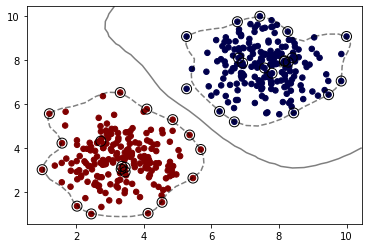

In [20]:
plot_svm_boundary(model, X,y)

Here, we pick up lot more noises with these support vectors.

As Gamma gets larger its defining more and more influence.

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


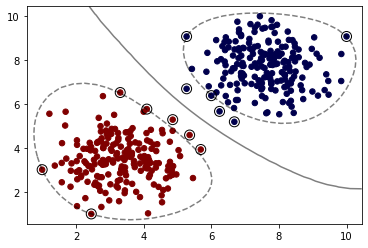

In [23]:
model = SVC(C = 1, kernel= "rbf",  gamma = "scale")
model.fit(X,y)
plot_svm_boundary(model, X, y)

# Sigmoid

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


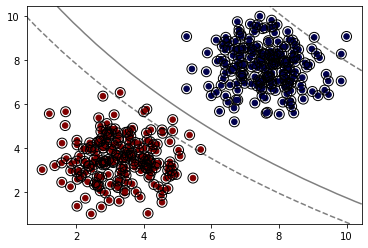

In [25]:
model = SVC(C = 1, kernel = "sigmoid")
model.fit(X,y)
plot_svm_boundary(model, X, y)

# Polynomial

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


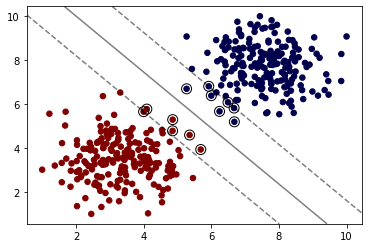

In [27]:
model = SVC(kernel = "poly", C =1, degree=1)
model.fit(X,y)
plot_svm_boundary(model, X, y)

As you begin to raise the degree the lines begins to curve.

# Grid Search CV

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
svm = SVC()

In [31]:
param_grid = {"C":[0.01, 0.1, 1], "kernel":["linear", "rbf"]}

In [32]:
grid = GridSearchCV(svm, param_grid)

In [33]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [34]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}